<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [4]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [5]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       738
neighborhood_overview                            9773
host_id                                             0
host_name                                           3
host_since                                          3
host_location                                    4376
host_about                                       6775
host_response_time                               2890
host_response_rate                               2890
host_acceptance_rate                             2744
host_is_superhost                                 567
host_neighbourhood                               9776
host_listings_count                                 3
host_total_listings_count                           3
host_verifications                                  3
host_has_profile_pic        

In [6]:
#Calculamos el numero total de la población "n"
Barcelona['beds']. info()
n=18927

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
14874 non-null  float64
dtypes: float64(1)
memory usage: 148.0 KB


In [7]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['beds'].max()
Min=Barcelona['beds'].min()
Limites= [Min, Max]
Limites

[0.0, 127.0]

In [8]:
#Calculamos el rango R
R=Max-Min
R

127.0

In [9]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [10]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

8.099603618080428

**Creación de Categorias a partir de clases**

In [11]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 127.1, 16)
intervalos

array([-1.0000e-01,  8.3800e+00,  1.6860e+01,  2.5340e+01,  3.3820e+01,
        4.2300e+01,  5.0780e+01,  5.9260e+01,  6.7740e+01,  7.6220e+01,
        8.4700e+01,  9.3180e+01,  1.0166e+02,  1.1014e+02,  1.1862e+02,
        1.2710e+02])

In [12]:
#Creamos las categorías 
categorias= ["Categoría1(0-8.3 beds)", "Categoría2 (8.4-1.6 beds)","Categoría3 (1.7-2.5 beds)", "Categoría4 (2.6-3.3 beds)",
             "Categoría5 (3.4-4.2 beds)", "Categoría6 (4.3-5 beds)","Categoría7 (5.1-5.9 beds)", "Categoría8 (6-6.7 beds)",
             "Categoría9 (6.8-7.6 beds))", "Categoría10 (7.7-8.4 beds)","Categoría11 (8.5-9.3 beds)", "Categoría12 (9.4-1 beds)",
             "Categoría13 (1.1-1.10 beds)", "Categoría14 (1.11-1.18 beds)","Categoría15 (1.19-1.27 beds)"]

In [13]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['beds']=pd.cut(x= Barcelona['beds'], bins=intervalos, labels= categorias)
Barcelona['beds']

0              Categoría1(0-8.3 beds)
1              Categoría1(0-8.3 beds)
2              Categoría1(0-8.3 beds)
3              Categoría1(0-8.3 beds)
4              Categoría1(0-8.3 beds)
5              Categoría1(0-8.3 beds)
6              Categoría1(0-8.3 beds)
7              Categoría1(0-8.3 beds)
8              Categoría1(0-8.3 beds)
9              Categoría1(0-8.3 beds)
10                                NaN
11                                NaN
12             Categoría1(0-8.3 beds)
13             Categoría1(0-8.3 beds)
14             Categoría1(0-8.3 beds)
15             Categoría1(0-8.3 beds)
16             Categoría1(0-8.3 beds)
17             Categoría1(0-8.3 beds)
18             Categoría1(0-8.3 beds)
19             Categoría1(0-8.3 beds)
20             Categoría1(0-8.3 beds)
21             Categoría1(0-8.3 beds)
22             Categoría1(0-8.3 beds)
23             Categoría1(0-8.3 beds)
24             Categoría1(0-8.3 beds)
25             Categoría1(0-8.3 beds)
26          

In [14]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['beds'].value_counts().reset_index()
Tabla_freq

beds  count
0         Categoría1(0-8.3 beds)  14659
1      Categoría2 (8.4-1.6 beds)    189
2      Categoría3 (1.7-2.5 beds)     21
3      Categoría4 (2.6-3.3 beds)      4
4   Categoría15 (1.19-1.27 beds)      1
5      Categoría5 (3.4-4.2 beds)      0
6        Categoría6 (4.3-5 beds)      0
7      Categoría7 (5.1-5.9 beds)      0
8        Categoría8 (6-6.7 beds)      0
9     Categoría9 (6.8-7.6 beds))      0
10    Categoría10 (7.7-8.4 beds)      0
11    Categoría11 (8.5-9.3 beds)      0
12      Categoría12 (9.4-1 beds)      0
13   Categoría13 (1.1-1.10 beds)      0
14  Categoría14 (1.11-1.18 beds)      0

In [15]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

beds  count
0        Categoría1(0-8.3 beds)  14659
1     Categoría2 (8.4-1.6 beds)    189
2     Categoría3 (1.7-2.5 beds)     21
3     Categoría4 (2.6-3.3 beds)      4
4  Categoría15 (1.19-1.27 beds)      1

In [16]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('beds')
Filtro_index

count
beds                               
Categoría1(0-8.3 beds)        14659
Categoría2 (8.4-1.6 beds)       189
Categoría3 (1.7-2.5 beds)        21
Categoría4 (2.6-3.3 beds)         4
Categoría15 (1.19-1.27 beds)      1

Text(0, 0.5, 'Frecuencia')

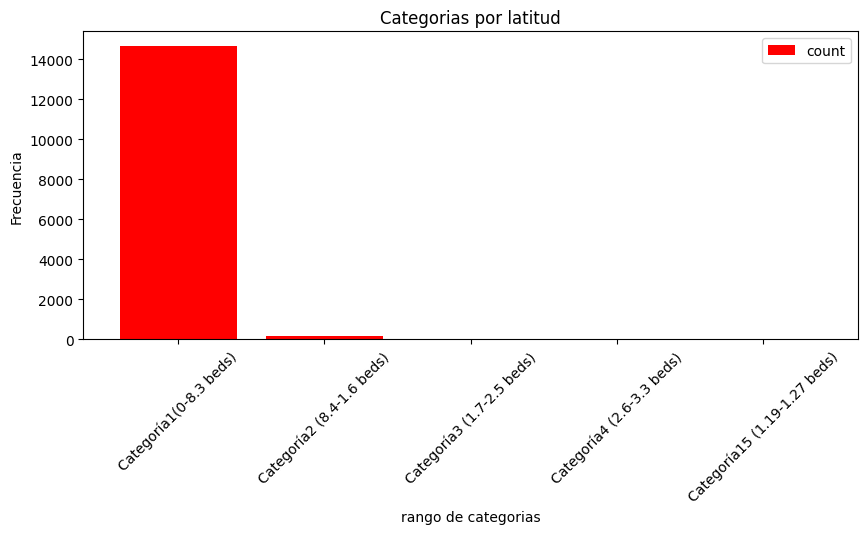

In [17]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')